# Test

In [3]:
import tensorflow as tf

from tensorflow import keras

In [184]:
#TEMP LIBRARIES

#library to read and import file from drive
import os
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#images
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn_image as isns
import skimage.exposure

import numpy as np
from numpy.random import default_rng
import random
import imutils

#### Functions

In [5]:
def load_model(path="./"):
    return keras.models.load_model(path)

## Load pretrained model

In [6]:
autoencoder = load_model("../Models/autoencoderFC")

## Test image differences

In [317]:
def detect_anom(true_img, rec_img):
    anomaly=False
    
    # All values between 0 and 1
    rec_img[np.where((rec_img > [1]))] = 1
    rec_img[np.where((rec_img < [0]))] = 0

    # Calculate the difference between the original image and the reconstructed one
    diff = cv.absdiff(true_img, rec_img)

    # Scale values from 0..1 to 0..255 (required for opencv functions)
    diff = (diff*255).astype('uint8')

    # Threshold to make the image only white and black (so higlight the anomalies in white)
    ret, th = cv.threshold(diff, 150, 255, cv.THRESH_BINARY)

    # Find the countours of the anomalies
    cnts, _ = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    # For every anomaly, draw the bounding box
    anomalies_img = true_img.copy()
    for c in cnts:
        (x, y, w, h) = cv.boundingRect(c)
        anomalies_img = cv.rectangle(anomalies_img, (x-20, y-20), (x + w + 20, y + h + 20), (0, 255, 0), 2)
        # If some anomaly is found, we classify the image as anomalous
        anomaly=True
    
    return anomaly, anomalies_img.astype('float32')/255.

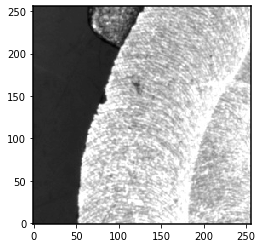

In [318]:
test_img = cv.imread('../Data/Prepared/Test/NOK/NOK_0-8.jpg', cv.IMREAD_GRAYSCALE).astype('float32')/255.
plt.imshow(test_img, cmap='gray')

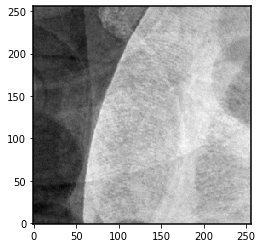

In [319]:
test_rec = autoencoder.predict(np.expand_dims(np.expand_dims(test_img, 0), -1))
test_rec = np.squeeze(test_rec[0], -1)
plt.imshow(test_rec, cmap='gray')

In [320]:
anomal, anomal_img = detect_anom(test_img, test_rec)
anomal

True

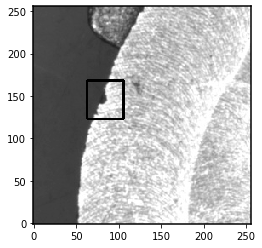

In [321]:
plt.imshow(anomal_img, cmap='gray')

In [349]:
# Load the validation set (all with defects)
def test_loader(dir='./', scale=False):
    imgs = {}
    labels = []
    for folder in os.listdir(dir):
        for img in os.listdir(dir + '/' + folder):
            label = re.findall(r'([A-Z]+)_\d+-', img)[0]
            if label == 'OK':
                labels.append(0)
            else:
                labels.append(1)

            img_num = re.findall(r'_(\d+)-', img)[0]
            img_order = int(re.findall(r'_\d+-(\d+)', img)[0])
            image = cv.imread((dir + '/' + folder + '/' + img), cv.IMREAD_GRAYSCALE)

            if scale:
                image = image.astype('float32') / 255.

            if (label+img_num) in imgs.keys():
                imgs[(label+img_num)].append([img_order, image])
            else:
                imgs[(label+img_num)] = [[img_order, image]]
    return imgs, labels

In [ ]:
def predict_image(img):

In [ ]:
def evaluate_model(model, x, y):
    

In [350]:
imgs, labels = test_loader('../Data/Prepared/Test')